# Gradiente Multivariable

In [2]:
import numpy as np
import matplotlib.pyplot as mpl
import random

In [3]:
#funcion de costo
#m->theta1
#b->theta0
def costo(X,y,theta):
    theta0=theta[0,0]
    theta0=theta[1,0]
    
    temp=theta0*X[:,0]+theta1*X[:,1] - y
    
    return np.dot(temp.T,temp) #multiplica fila por columna
#costo(x,y,theta)

In [3]:
def derivada(X,y,theta):
    theta0=theta[0,0]
    theta1=theta[1,0]
    
    temp=(theta0*X[:,0]+theta1*X[:,1] - y)    
    return temp.sum()

In [4]:
#gradiente lineal
def gradiente(X,y,theta,alpha,num_iter):
    m = X.shape[0]
    theta0 = theta[0,0]
    theta1 = theta[1,0]
    for i in range(num_iter):
        sumatoria = (theta[0,0] *X[:,0]+theta[1,0] *X[:,1] - y).sum()
        #sumatoria = derivada(X,y,theta)
        theta0 = theta[0,0] - (alpha/m) * sumatoria #*X[:0]=1
        theta1 = theta[1,0] - ((alpha/m)* sumatoria * X[:1]).sum()
        theta[0,0]=theta0
        theta[1,0]=theta1
        
        #print("Mi theta0 =",theta0," theta1 = ",theta1)
        
    return np.array([[theta0],[theta1]])


[[0.58333333]
 [1.16666667]]


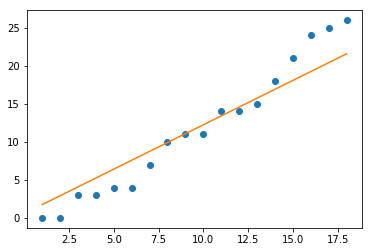

In [5]:
#init: Creando una matriz plantilla (2)
X = np.ones((18,2))tamTheta = np.size(X,1)
theta = np.zeros(tamTheta).reshape((tamTheta,1))
X[:,1] = np.arange(1,19)
Y=np.array([0,0,3,3,4,4,7,10,11,11,14,14,15,18,21,24,25,26])
Y = Y.reshape(len(Y),1)
#theta = np.zeros(2).reshape((2,1))

theta = gradiente(X,Y,theta,0.0001,100000)
print (theta)

mpl.plot(X[:,1],Y,'o')
mpl.plot(X[:,1],theta[1][0]*X[:,1]+theta[0][0])


## Regresion Linear

In [27]:
def regresion_linear(x,y):
    xt = np.transpose(x)
    tx = np.dot(xt, x)
    ty = np.dot(xt, y)
    theta = np.dot(np.linalg.inv(tx),ty)
    return theta


[[-3.41176471]
 [ 1.5872033 ]]


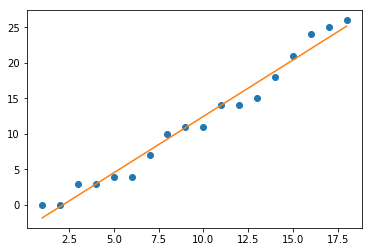

In [29]:
#creando una matriz plantilla
x= np.ones((18,2))
x[:,1] = np.arange(1,19)
#print(x)

# creo theta
tamTheta = np.size(x,1)
theta = np.zeros(tamTheta).reshape((tamTheta,1))
#print(theta)

y=np.array([0,0,3,3,4,4,7,10,11,11,14,14,15,18,21,24,25,26])
y=y.reshape(len(y),1)
#print(y)

theta = regresion_linear(x,y)
print(theta)

mpl.plot(x[:,1],y,'o')
mpl.plot(x[:,1],theta[0][0]+theta[1][0]*x[:,1])

### Multivariable

[[-1.55173353e+01]
 [ 1.54311838e+00]
 [ 4.74024478e-01]
 [ 3.03552398e-01]
 [ 6.15260734e-03]
 [-3.40653396e-04]
 [-1.60604974e-04]
 [-1.03200269e+00]]


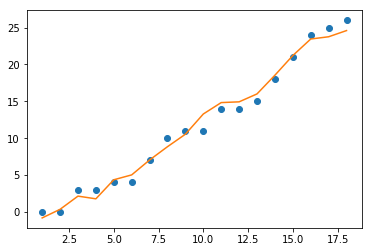

In [10]:
x= np.ones((18,8))
x[:,1] =np.arange(1,19) 
x[:,2] =[27.1,27.1,27.6,27.2,28.0,26.4,26.1,25.7,25.9,26.6,26,26.7,26.3,26,26.3,26.8,26.28,25.9]
x[:,3] =[26.5,28.22,28.23,26.4,24.6,28.4,26.9,27.9,28.1,29.6,26.4,26,24.7,28.7,26.9,27.9,28.4,27.3]
x[:,4] =[20,22,23,28,30,25,18,21,20,16,27,23,25,29,19,21,25,19] 
x[:,5] =[53,3,3,8,3,43,3640,3,3,570,43,3,67,3,3,2850,25,3]
x[:,6] =[46788,50000,50000,60000,50000,60235,45000,50000,50000,48665,42354,50000,51796,50000,40093,35742,49000,50000]
#x[:,7] =[-1,1,1,-1,1,-1,-1,1,1,-1,-1,1,-1,1,1,-1,-1,1] 
x[:,7] =[0.3,0.7,0.7,0.3,0.7,0.3,0.4,0.7,0.7,0.3,0.3,0.7,0.3,0.7,0.7,0.3,0.3,0.3] 

# creo theta
tamTheta = np.size(x,1)
theta = np.zeros(tamTheta).reshape((tamTheta,1))
#print(theta)

y=np.array([0,0,3,3,4,4,7,10,11,11,14,14,15,18,21,24,25,26])
y=y.reshape(len(y),1)
#print(y)

theta = regresion_linear(x,y)
print(theta)

mpl.plot(x[:,1],y,'o')
mpl.plot(x[:,1],theta[0][0]+theta[1][0]*x[:,1]+theta[2][0]*x[:,2]+theta[3][0]*x[:,3]+theta[4][0]*x[:,4]+theta[5][0]*x[:,5]+theta[6][0]*x[:,6]+theta[7][0]*x[:,7])


## Cross Validation

In [209]:
def partir(x,porcent):
    tam = x.shape[0]
    tam_test = round(tam*porcent/100)
    tam_train = tam-tam_test
    arreglo = np.arange(0,tam)
    rand = random.shuffle(arreglo)
    train = arreglo[:tam_train]
    test =arreglo[tam_train:]
    
    return train,test

#indices = partir(x,15) #15 % para test
#print(train)
#print(indices)


In [202]:
def construir(indices,X,Y):
    matrizx = np.zeros((len(indices),X.shape[1]))
    matrizy = np.zeros((len(indices),Y.shape[1]))    
    for i in range(0,len(indices)):
        matrizx[i,:]=X[indices[i]]
        matrizy[i,:]=Y[indices[i]]

    return matrizx,matrizy

#matrizx,matrizy =construir(train,x,y)
#print(matrizx)
#print(matrizy)

In [217]:
def train(X,Y) :
    indices = partir(X,15) #parte en 15% -> 3 datos
    nMatrizX,nMatrizY = construir(indices[0],X,Y)
    theta = regresion_linear(nMatrizX, nMatrizY)
    return theta

[[-8.16771508e-01]
 [ 1.48225197e+00]
 [ 6.15320049e-02]
 [ 3.33074152e-01]
 [ 1.14777015e-01]
 [-7.59429499e-04]
 [-2.69390897e-04]
 [-2.91177511e+00]]


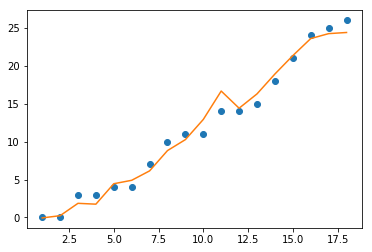

In [218]:
theta = train(x,y)
print(theta)

mpl.plot(x[:,1],y,'o')
mpl.plot(x[:,1],theta[0][0]+theta[1][0]*x[:,1]+theta[2][0]*x[:,2]+theta[3][0]*x[:,3]+theta[4][0]*x[:,4]+theta[5][0]*x[:,5]+theta[6][0]*x[:,6]+theta[7][0]*x[:,7])
